In [56]:
! gdown --id 1XZu5_K5EtvOlUVuqTTB5mtXeMo4FXy9c

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XZu5_K5EtvOlUVuqTTB5mtXeMo4FXy9c
To: /content/tweet_emotions.csv
100% 3.77M/3.77M [00:00<00:00, 115MB/s]


In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv('/content/tweet_emotions.csv')

df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


# **Preprocessing Data**

---

**Membersihkan Mention**

In [59]:
# penggunaan library re
import re

def cleaningText(text):
  # menghapus @mention
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  # menghapus hashtag
  text = re.sub(r'#', '', text)
  # menghapus RT (Retweet Text)
  text = re.sub(r'RT[\s]+', '', text)
  # menghapus link
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

**Tahap Case Folding**

In [60]:
# penggunaan library string
import string

def casefolding(text):
  # menyamakan penggunaan huruf menjadi lowercase
  text = text.lower()
  # menghapus angka
  text = re.sub(r"\d+", "", text)
  # menghapus tanda baca
  text = text.translate(str.maketrans("","",string.punctuation))
  # Menghapus double spasi
  text = re.sub('\s+',' ',text)
  return text

**Tahap Tokenizing**

In [61]:
# import library nltk untuk tahap tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenizing(text):
  # memisah text
  text = word_tokenize(text)
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Tahap Filtering**

In [62]:
# import library nltk untuk menghapus stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# menetapkan variabel stop words dengan stopwords english
english_stopwords = set(stopwords.words('english'))

def filtering(text):
  # menghapus stopwords
  text = [word for word in text 
          if (word not in english_stopwords and
              word not in string.punctuation)]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tahap Stemming**

In [63]:
# import library nltk untuk tahap stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def stemming(text):
  # melakukan stemming pada text dengan PorterStemmer
  text = [ps.stem(word) for word in text]
  return text

In [64]:
# Menggabungkan kata hasil stemming ke dalam satu kesatuan kalimat
def rejoin(text):
  text = np.array(text)
  text = ' '.join(text)
  return text

In [65]:
# Data Sebelum preprocessing
print("Before preprocessing data\n")
print(df['content'].head())

# implementasi seluruh fungsi ke dalam content
def preprocessing(text):
    text = cleaningText(text)
    text = casefolding(text)
    text = tokenizing(text)
    text = filtering(text)
    text = stemming(text)
    text = rejoin(text)
    return text

# Menampilkan hasil setelah pre-processing
df['after_preprocessing'] = df['content'].apply(preprocessing)
print("\nAfter preprocessing data\n")
print(df['after_preprocessing'].head())

Before preprocessing data

0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
Name: content, dtype: object

After preprocessing data

0    know listenin bad habit earlier start freakin ...
1                layin n bed headach ughhhhwaitin call
2                          funer ceremonygloomi friday
3                                want hang friend soon
4                 want trade someon houston ticket one
Name: after_preprocessing, dtype: object


In [66]:
df.head(10)

,tweet_id,sentiment,content,after_preprocessing
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,reping didnt go prom bc bf didnt like friend
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sleep im think old friend want he marri damn a...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,hmmm
8,1956969035,sadness,@charviray Charlene my love. I miss you,charlen love miss
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,im sorri least friday


# **Clustering**

---

**Mengambil 2 kolom**

In [67]:
data = df[['sentiment','after_preprocessing']]

data.head(10)

,sentiment,after_preprocessing
0,empty,know listenin bad habit earlier start freakin ...
1,sadness,layin n bed headach ughhhhwaitin call
2,sadness,funer ceremonygloomi friday
3,enthusiasm,want hang friend soon
4,neutral,want trade someon houston ticket one
5,worry,reping didnt go prom bc bf didnt like friend
6,sadness,sleep im think old friend want he marri damn a...
7,worry,hmmm
8,sadness,charlen love miss
9,sadness,im sorri least friday


**Cek missing value**

In [68]:
# menghitung jumlah data missing
data.isnull().sum()

sentiment              0
after_preprocessing    0
dtype: int64

**Menampilkan list kata yang digunakan**

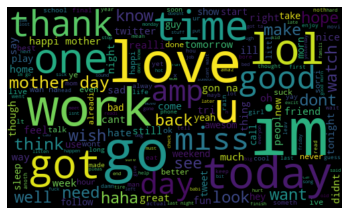

In [69]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# plot the word
allWords = ' '.join([twts for twts in data['after_preprocessing']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=100).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Menghitung subjectivity dan polarity**

In [70]:
from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['subjectivity'] = data['after_preprocessing'].apply(getSubjectivity)
data['polarity'] = data['after_preprocessing'].apply(getPolarity)

data.head(10)

<ipython-input-70-3b8806e305d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subjectivity'] = data['after_preprocessing'].apply(getSubjectivity)


,sentiment,after_preprocessing,subjectivity,polarity
0,empty,know listenin bad habit earlier start freakin ...,0.583333,-0.35
1,sadness,layin n bed headach ughhhhwaitin call,0.000000,0.00
2,sadness,funer ceremonygloomi friday,0.000000,0.00
3,enthusiasm,want hang friend soon,0.000000,0.00
4,neutral,want trade someon houston ticket one,0.000000,0.00
5,worry,reping didnt go prom bc bf didnt like friend,0.000000,0.00
6,sadness,sleep im think old friend want he marri damn a...,0.200000,0.10
7,worry,hmmm,0.000000,0.00
8,sadness,charlen love miss,0.600000,0.50
9,sadness,im sorri least friday,0.400000,-0.30


**Melakukan cluster dengan n_cluster=3**

In [71]:
from sklearn.cluster import KMeans

# mengelompokkan data ke dalam 3 kategori/cluster
km = KMeans(n_clusters=3)

x_array = np.array(data.iloc[:,2:4])

km.fit(x_array)

data['kluster'] = km.labels_
data.head(10)

,sentiment,after_preprocessing,subjectivity,polarity,kluster
0,empty,know listenin bad habit earlier start freakin ...,0.583333,-0.35,2
1,sadness,layin n bed headach ughhhhwaitin call,0.000000,0.00,0
2,sadness,funer ceremonygloomi friday,0.000000,0.00,0
3,enthusiasm,want hang friend soon,0.000000,0.00,0
4,neutral,want trade someon houston ticket one,0.000000,0.00,0
5,worry,reping didnt go prom bc bf didnt like friend,0.000000,0.00,0
6,sadness,sleep im think old friend want he marri damn a...,0.200000,0.10,0
7,worry,hmmm,0.000000,0.00,0
8,sadness,charlen love miss,0.600000,0.50,1
9,sadness,im sorri least friday,0.400000,-0.30,2


# **Labeling**

--------

In [72]:
conditions = [
    (data['kluster']==0),
    (data['kluster']==1),
    (data['kluster']==2)]
choices = ['Positive','Neutral','Negative']
data['kluster'] = np.select(conditions, choices)

data.head(25)

,sentiment,after_preprocessing,subjectivity,polarity,kluster
0,empty,know listenin bad habit earlier start freakin ...,0.583333,-0.350000,Negative
1,sadness,layin n bed headach ughhhhwaitin call,0.000000,0.000000,Positive
2,sadness,funer ceremonygloomi friday,0.000000,0.000000,Positive
3,enthusiasm,want hang friend soon,0.000000,0.000000,Positive
4,neutral,want trade someon houston ticket one,0.000000,0.000000,Positive
5,worry,reping didnt go prom bc bf didnt like friend,0.000000,0.000000,Positive
6,sadness,sleep im think old friend want he marri damn a...,0.200000,0.100000,Positive
7,worry,hmmm,0.000000,0.000000,Positive
8,sadness,charlen love miss,0.600000,0.500000,Neutral
9,sadness,im sorri least friday,0.400000,-0.300000,Negative


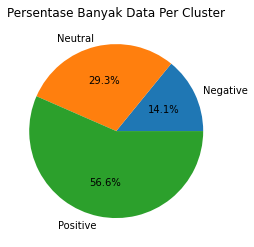

In [73]:
# cek presentase per label
my_data = data.groupby(['kluster'])['kluster'].count()
my_labels = data['kluster'].unique()
my_labels.sort()
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Persentase Banyak Data Per Cluster')
plt.show()

In [ ]:
centroids = km.cluster_centers_
print(centroids)

[[ 0.60937633  0.44365965]
 [ 0.04780219  0.01131604]
 [ 0.72323762 -0.35750159]]


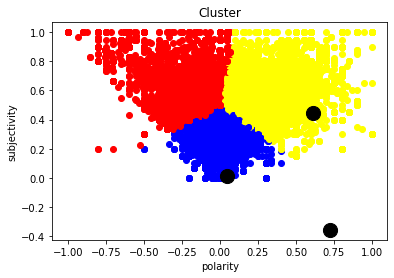

In [ ]:
for index, row in data.iterrows():
    if row['kluster'] == 'Positive':
        plt.scatter(row['polarity'], row['subjectivity'], color="yellow")
    elif row['kluster'] == 'Neutral':
        plt.scatter(row['polarity'], row['subjectivity'], color="blue")
    elif row['kluster'] == 'Negative':
        plt.scatter(row['polarity'], row['subjectivity'], color="red")
    
plt.title('Cluster')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.scatter(centroids[:,0],centroids[:,1], color='black', s=200)
plt.show()

# **Classification**

--------

**Encode kluster**

In [137]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['kluster'] = le.fit_transform(data['kluster'])

data.head(10)

,sentiment,after_preprocessing,subjectivity,polarity,kluster
0,empty,know listenin bad habit earlier start freakin ...,0.583333,-0.35,0
1,sadness,layin n bed headach ughhhhwaitin call,0.000000,0.00,2
2,sadness,funer ceremonygloomi friday,0.000000,0.00,2
3,enthusiasm,want hang friend soon,0.000000,0.00,2
4,neutral,want trade someon houston ticket one,0.000000,0.00,2
5,worry,reping didnt go prom bc bf didnt like friend,0.000000,0.00,2
6,sadness,sleep im think old friend want he marri damn a...,0.200000,0.10,2
7,worry,hmmm,0.000000,0.00,2
8,sadness,charlen love miss,0.600000,0.50,1
9,sadness,im sorri least friday,0.400000,-0.30,0


**Pembobotan dengan TF-IDF**

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

bow = TfidfVectorizer()

X = bow.fit_transform(data['after_preprocessing'])
y = data['kluster']

**Pemisahan data training dan testing**

In [141]:
# Pemisahan data training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Pembuatan model dengan DecisionTreeClassifier**

In [142]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#inisiasi MultinomialNB
mnb = MultinomialNB()

#fit model
mnb.fit(X_train, y_train)

#prediksi dengan data training
y_pred_train = mnb.predict(X_train)

#evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

#prediksi dengan data testing
y_pred_test = mnb.predict(X_test)

#evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

#print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.79921875
Hasil akurasi data test: 0.73575


# **Predict**

--------

In [143]:
# print hasil prediksi data testing
print(y_pred_test[0:20])

[2 2 2 1 1 2 1 2 2 1 2 2 0 1 1 2 2 2 2 2]


In [144]:
# print data testing sebenarnya
print(y_test[0:20])

12836    2
10913    2
4214     2
8198     1
31403    1
13917    1
27440    1
11667    1
29616    2
39864    1
7817     2
34101    2
10131    0
31896    1
14655    1
14706    2
26870    2
28971    2
37394    2
12434    2
Name: kluster, dtype: int64


In [145]:
res = pd.DataFrame({})

# Make Prediction with new data
new_data = pd.DataFrame({
   'data': ["@charviray Charlene my love. I miss you", 
            "Choked on her retainers",
            "@PerezHilton lady gaga tweeted about not being impressed by her video leaking just so you know"],
})


# Vectorize
new_data = new_data['data'].apply(preprocessing)
res['data'] = new_data;
new_data = bow.transform(new_data)

# Predict
new_pred = mnb.predict(new_data)

# Evaluation
new_pred = pd.Series(new_pred).map({0: 'Negative', 1:'Neutral', 2:'Positive'})
res['prediksi'] = new_pred

res

,data,prediksi
0,charlen love miss,Neutral
1,choke retain,Positive
2,ladi gaga tweet impress video leak know,Positive


# **Evaluasi**

--------

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.12      0.21      1084
           1       0.88      0.54      0.67      2421
           2       0.70      0.99      0.82      4495

    accuracy                           0.74      8000
   macro avg       0.85      0.55      0.57      8000
weighted avg       0.79      0.74      0.69      8000



Text(69.0, 0.5, 'Actual')

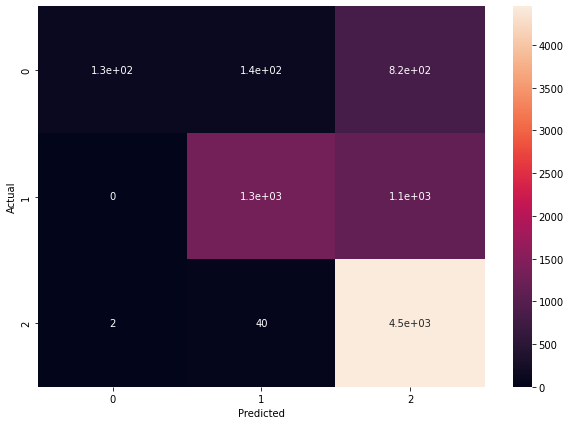

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_pred_test)

%matplotlib inline
plt.figure(figsize=(10, 7))
sns.heatmap(mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [148]:
from sklearn.metrics import roc_auc_score

y_pred_probs = mnb.predict_proba(X_test)

auc_mnb = roc_auc_score(y_test, y_pred_probs, multi_class="ovr")

#print hasil evaluasi
print(f'AUC Score of Model: {auc_mnb}')

AUC Score of Model: 0.8998481566769829


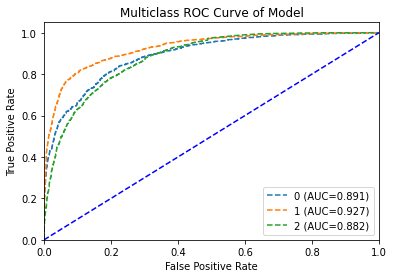

In [149]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
classes = le.classes_

#Mendefinisikan set ROC
fpr = {}
tpr = {}
thres = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thres[i] = roc_curve(y_test_bin[:,i], y_pred_probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s (AUC=%0.3f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve of Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()